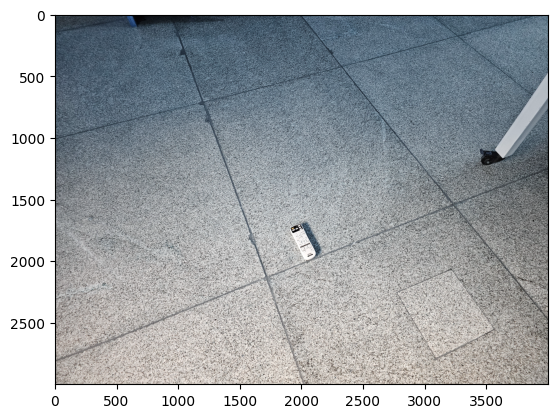

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('21 Oct 2024 at 08_34.jpg', cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show()

#### Affine Correction

Get coordinates from the image for affine transformation

In [18]:
# affine correction: parallel points remain preserved but angles may not remain preserved
import numpy as np

points = []

def mouse_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        print(points)


cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('image', mouse_event)
cv2.imshow('image', img)

while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
points = np.array(points, dtype=np.float32)


[(2003, 2956)]
[(2003, 2956), (1089, 411)]
[(2003, 2956), (1089, 411), (384, 915)]
[(2003, 2956), (1089, 411), (384, 915), (3515, 114)]


KeyboardInterrupt: 

: 

#### points from the image(for verticall parallels from the tile around the remote): [(1717, 2136), (1203, 716), (3236, 1547), (2327, 432)]
#### points from the image(one for verticall parallels and other for horizontal parallel): [(2003, 2956), (1089, 411), (384, 915), (3515, 114)]

[[1717. 2136.]
 [1203.  716.]
 [3236. 1547.]
 [2327.  432.]]


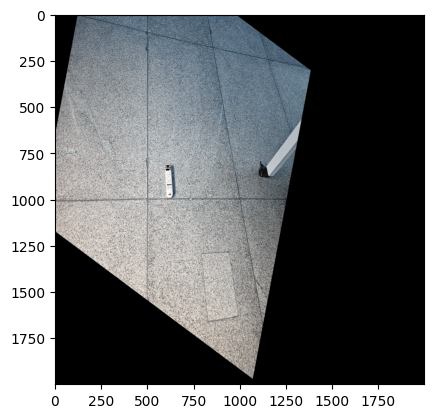

In [2]:
import numpy as np

points = [[1717, 2136], [1203, 716], [3236, 1547], [2327, 432]]
points = np.array(points, dtype=np.float32)

print(points)
rotated_coordinates = np.array([[500, 1000], [500, 100], [1000, 1000], [1000, 100]], dtype=np.float32)

# get the affine transformation matrix
affine_matrix = cv2.getAffineTransform(points[:3], rotated_coordinates[:3])

# apply the affine transformation
img_affine = cv2.warpAffine(img, affine_matrix, (2000, 2000))

plt.imshow(img_affine)
plt.show()

In [3]:
# perform orthographic correction on the image
points1 = []

def mouse_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points1.append((x, y))
        print(points1)


cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('image', mouse_event)
cv2.imshow('image', img_affine)
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

points1 = np.array(points1, dtype=np.float32)

[(498, 1000)]
[(498, 1000), (499, 99)]
[(498, 1000), (499, 99), (999, 999)]
[(498, 1000), (499, 99), (999, 999), (855, 184)]


: 

#### bl, tl, br, tr = [(498, 1000), (499, 99), (999, 999), (855, 184)]

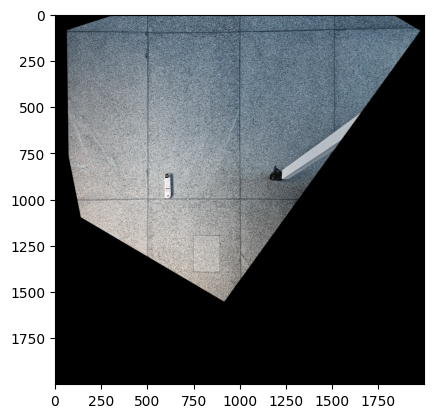

In [3]:
# using perspective transformation

selected_coordinates = np.array([(498, 1000), (499, 99), (999, 999), (855, 184)], dtype=np.float32)

# bl, tl, br, tr
transformed_coordinates = np.array([[0, 2000], [0, 0], [2000, 2000], [2000, 0]], dtype=np.float32)

perspective_matrix = cv2.getPerspectiveTransform(selected_coordinates, rotated_coordinates)

img_perspective = cv2.warpPerspective(img_affine, perspective_matrix, (2000, 2000))

plt.imshow(img_perspective)
plt.show()

#### Now, we have the dimensions of the image, and we can get the dimensions of the remote through point selection

get the remote dimensions

In [9]:
remote_points = []

def mouse_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        remote_points.append((x, y))
        print(remote_points)


cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('image', mouse_event)
cv2.imshow('image', img_perspective)
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

remote_points = np.array(remote_points, dtype=np.float32)

[(594, 983)]
[(594, 983), (592, 864)]
[(594, 983), (592, 864), (624, 992)]
[(594, 983), (592, 864), (624, 992), (620, 863)]


KeyboardInterrupt: 

: 

In [4]:
tile_points = []

def mouse_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        tile_points.append((x, y))
        print(tile_points)


cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('image', mouse_event)
cv2.imshow('image', img_perspective)
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

tile_points = np.array(tile_points, dtype=np.float32)

[(502, 1002)]
[(502, 1002), (500, 102)]
[(502, 1002), (500, 102), (1001, 1002)]
[(502, 1002), (500, 102), (1001, 1002), (999, 99)]


KeyboardInterrupt: 

: 

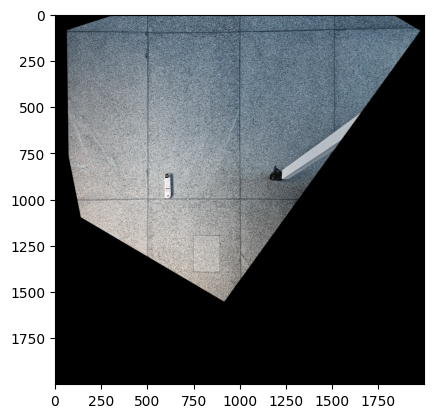

In [4]:
plt.imshow(img_perspective)
plt.show()

Remote coordinates (bl,tl,br,tr) = [(594, 983), (592, 864), (624, 992), (620, 863)]

Tile coordinates (bl,tl,br,tr) = [[(502, 1002), (500, 102), (1001, 1002), (999, 99)]]

In [5]:
# Now we have the tile points as (bl,tl,br,tr) = [[(502, 1002), (500, 102), (1001, 1002), (999, 99)]]
# and the remote points as (bl,tl,br,tr) = [[(594, 983), (592, 864), (624, 992), (620, 863)]]
tile_points = np.array([(502, 1002), (500, 102), (1001, 1002), (999, 99)], dtype=np.float32)
remote_points = np.array([(594, 983), (592, 864), (624, 992), (620, 863)], dtype=np.float32)
# Using the tile points and its actual dimensions, we can get the actual size of the remote

# Suppose the tile size is 10cm x 20cm
actual_tile_width = 30
actual_tile_height = 60

# get the distance between the bottom left and bottom right points
distance_tile_bottom = np.sqrt((tile_points[0][0] - tile_points[2][0]) ** 2 + (tile_points[0][1] - tile_points[2][1]) ** 2)

# get the distance between the top left and top right points
distance_tile_top = np.sqrt((tile_points[1][0] - tile_points[3][0]) ** 2 + (tile_points[1][1] - tile_points[3][1]) ** 2)


distance_tile_left = np.sqrt((tile_points[0][0] - tile_points[1][0]) ** 2 + (tile_points[0][1] - tile_points[1][1]) ** 2)
print(distance_tile_bottom, distance_tile_top)

# get the width and height scale from the actual tile dimensions
w_scale = distance_tile_bottom / actual_tile_width

h_scale = distance_tile_left / actual_tile_height

print(w_scale, h_scale)

# Now we can scale the remote points to get the actual remote dimensions
remote_distance_bottom = np.sqrt((remote_points[0][0] - remote_points[2][0]) ** 2 + (remote_points[0][1] - remote_points[2][1]) ** 2)
remote_distance_left = np.sqrt((remote_points[0][0] - remote_points[1][0]) ** 2 + (remote_points[0][1] - remote_points[1][1]) ** 2)

actual_remote_width = remote_distance_bottom / w_scale
actual_remote_height = remote_distance_left / h_scale

print("Remote Dimensions(cm): ", actual_remote_width, actual_remote_height)

499.0 499.00901795458566
16.633333333333333 15.000037036991312
Remote Dimensions(cm):  1.883021214031963 7.9344341112305194
